## Joint histograms and mutual information

In this notebook, we will learn about joint histograms and see that "spread out" joint histograms 
have low mutual information, while "compact" joint histograms have high mutual information.

As usual, first import libraries and load some images.

In [3]:
import numpy as np
import SimpleITK as sitk

import itkwidgets

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
movingImage = sitk.ReadImage('../sampleImages/ct_2d_moving.tif')
trueMovingImage = sitk.ReadImage('../sampleImages/ct_2d_true.tif')
fixedImage  = sitk.ReadImage('../sampleImages/mri_2d.tif')

In [5]:
fixed_arr = sitk.GetArrayFromImage(fixedImage)
true_mvg_arr = sitk.GetArrayFromImage(trueMovingImage)
mvg_arr = sitk.GetArrayFromImage(movingImage)

You are probably familiar with histograms. They display how likely it is that any given intensity will appear in the image.  Let's plot the histogram of intensities for the CT image:


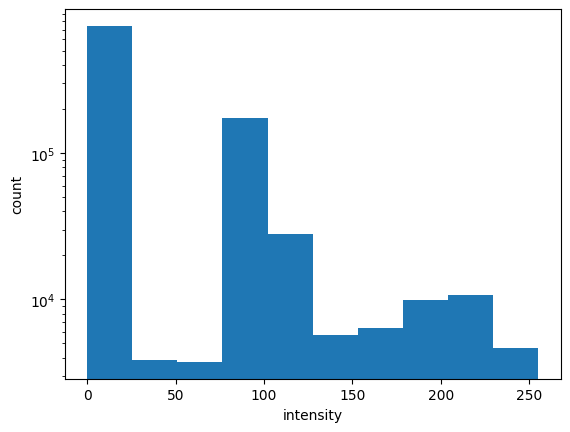

In [25]:
plt.hist(mvg_arr.flatten())
plt.xlabel('intensity')
plt.ylabel('count');

Notice that zeros are very common, moderate intensities are second-most likely, and high intensities are rare.

Try changing the histogram plot to use a log scale for the counts by giving `log=True` as an argument to the `hist` function.

A joint histogram is similar idea that shows the relationship between the intensities of two different images. Let's compare the CT image before registration with the target MR image.

One way to display a joint histogram is with a scatter plot.  In the plot below, there is one point for every pixel. The x-location is the intensity of the CT image, and the y-location is the intensity of the MR image at that pixel. 

Text(0, 0.5, 'MR intensity')

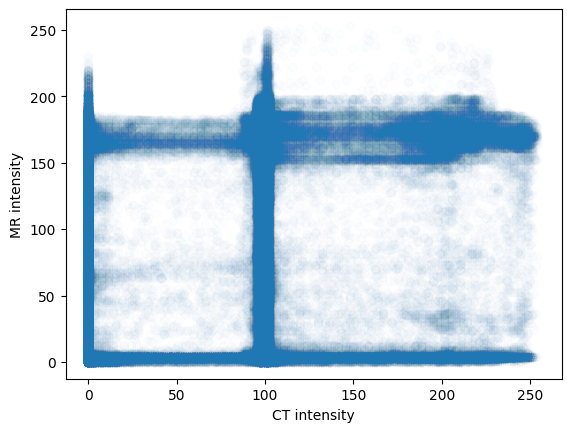

In [29]:
plt.scatter(mvg_arr[:,:1100].flatten(),fixed_arr[:,:1100].flatten(),alpha=0.01);
plt.xlabel('CT intensity')
plt.ylabel('MR intensity');

Notice that the histogram is very "spread out" in certain ways.  Specifically pixels where the CT image has an intensity of zero could have ANY value for the intensity of the MR image. Similarly, pixels with high intensities in the MR image small, medium, or large intensities in the CT.
 
Let's now look at the joint histogram when the CT and Mr image are correctly aligned:

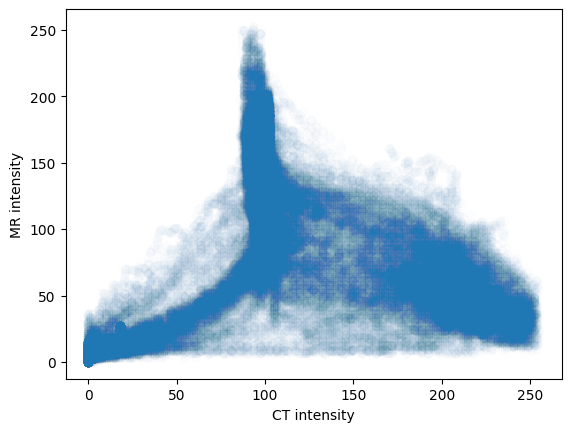

In [28]:
plt.scatter(true_mvg_arr[:,:1100].flatten(),fixed_arr[:,:1100].flatten(),alpha=0.01);
plt.xlabel('CT intensity')
plt.ylabel('MR intensity');

See that the histogram is more compact.  Now, pixels where the CT image has intensity zero always correspond to zero or small intensities in the MR image. As well, pixels with high intensities in the MR image always have medium intensities in the CT image.

The images below show how three popular similarity metrics (mean squared error, cross correlation, and mutual information) behave for data with different properties.

First consider mean squared error (MSE) ([credit1](https://commons.wikimedia.org/wiki/File:Mutual_Information_Examples.svg),[credit2](https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg)):

<img src="mse.png" style="width:600px;height:400px;">


Look at the top two rows, and notice that mean squared error is sensitive both to how much spread there is in the data, and the linear relationship between the data.  Data with a larger spread have a lower mse (the top row has larger or equal MSE.  

Here's the same plot, but now displaying the correlation.

<img src="cor.png" style="width:600px;height:400px;">

Notice that it is sensitive to the amount of spread in the data, but is not sensitive to the slope of the data.


Finally, the same plot, but now displaying the mutual information (MI).

<img src="mi.png" style="width:600px;height:400px;">

Notice that it is sensitive only to the spread and not to the slope or directionality of the relationship between
the variabiles. In particular, notice that MI can differentiate between the data in the bottom row, whereas the cross correlation is zero for all of those datasets.


In [2]:
# H, fedges, medges = np.histogram2d(f, m, bins=64)

# plt.imshow( np.log(H + 0.001))

# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
# ax1.pcolormesh(medges, fedges, H, cmap='rainbow')
# ax1.set_xlim(f.min(), f.max())
# ax1.set_ylim(m.min(), m.max())
# ax1.set_xlabel('moving image intensities')
# ax1.set_ylabel('fixed image intensities')
# ax1.set_title('histogram')
# ax1.grid()